In [4]:
import pandas as pd
data = pd.read_csv('IMDB Dataset.csv', engine='python')


data.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
data.sample(10)

,review,sentiment
14360,This movie is a hidden gem. I can't understand...,positive
20336,Actually I'm surprised there were so many comm...,positive
41134,Many people judge it as a fan service film bec...,positive
43841,"These are the kinds of movies I loved, and sti...",positive
13270,Anyone who knows me even remotely can tell you...,negative
28423,Brass pictures (movies is not a fitting word f...,negative
47979,A truly excellent look at the world and the re...,positive
41107,In Alfred Hitchcock's adaptation of Patricia H...,positive
47185,This movie documents the Harlem ball circuit o...,positive
12531,Loved today's show!!! It was a variety and not...,positive


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:

data.duplicated().sum()

np.int64(418)

In [8]:
data = data.drop_duplicates(subset=['review']).reset_index(drop=True)

In [9]:
data['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


In [10]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

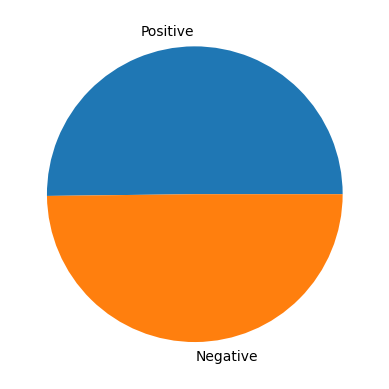

In [11]:
data_dist = [
    len(data[data['sentiment']=='positive']),
    len(data[data['sentiment']=='negative'])
]
labels = ['Positive','Negative']
plt.pie(data_dist, labels = labels)
plt.show

In [12]:

import re

In [13]:

def removeHTML(text):
    text = re.sub(r'<[^>]*>', '', text)
    return(text)

In [14]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:

def removeStopWords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    return(text)

In [16]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
def Lemmatizing(text):
    text = lemmatizer.lemmatize(text)
    return(text)

In [18]:
def removeNoise(text):
    text = re.sub(r'[^a-zA-Z\s]+', '', text) # Only keep English letters
    text = re.sub(r'(\w)\1{2,}', r'\1', text)   #Normalize Repeated Letters
    text = re.sub(r'\s{2,}', ' ', text).strip() # Removing extra spaces
    return(text)

In [19]:

CleanedText = []

In [20]:
for i in range(len(data)):
    text = data.review[i]
    text = removeHTML(text)
    text = removeStopWords(text)
    text = Lemmatizing(text)
    text = removeNoise(text)
    CleanedText.append(text)

In [21]:

data['CleanedText'] = CleanedText

In [22]:
data.head()

,review,sentiment,CleanedText
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [23]:

data.sample(20)


,review,sentiment,CleanedText
28910,Stupid horror film about five 20 somethings (3...,negative,stupid horror film five somethings guys girls ...
42953,I have in the past loved Tim Burton. I loved E...,negative,past loved tim burton loved ed wood edward sci...
49439,Probably the only thing that got the movie up ...,negative,probably thing got movie four fact love peter ...
40504,I can never figure if this is the Artiest Soap...,positive,never figure artiest soap opera ever produced ...
7870,VIVAH is in my book THE BEST MOVIE OF 2006 ! P...,positive,vivah book best movie period book one best mov...
13292,Reasons to watch the movie:<br /><br />1) Bo D...,negative,reasons watch movie bo derek looks good occasi...
29424,"Dreadful, stupidly inane film dealing with cor...",negative,dreadful stupidly inane film dealing corruptio...
10779,There should be a rule that states quite clear...,negative,rule states quite clearly movies like resident...
14937,a movie about the cruelty of this world. I fou...,positive,movie cruelty world found liberating truth be ...
23600,"Movies aren't always suppose to be about deep,...",positive,movies always suppose deep provolking thoughts...


In [24]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=0)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [26]:
X_train = vectorizer.fit_transform(train['CleanedText'])
X_test = vectorizer.transform(test['CleanedText'])

In [27]:
from sklearn.metrics import classification_report,f1_score,accuracy_score


In [28]:
from sklearn.naive_bayes import MultinomialNB


In [29]:
mnb = MultinomialNB()

mnb.fit(X_train, train['sentiment'])


MultinomialNB()

In [30]:
pred_y_mnb = mnb.predict(X_test)

In [31]:
print('Classification Report:\n')
print(classification_report(test['sentiment'], pred_y_mnb))
print('_'*100)
print('Accuracy:',accuracy_score(test['sentiment'], pred_y_mnb))
print('_'*100)
print('F1 Score:',f1_score(test['sentiment'], pred_y_mnb, average='weighted'))

Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4909
    positive       0.86      0.85      0.85      5008

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

____________________________________________________________________________________________________
Accuracy: 0.8551981446001815
____________________________________________________________________________________________________
F1 Score: 0.8551956268617787


In [32]:

from sklearn.ensemble import RandomForestClassifier

In [33]:

rf = RandomForestClassifier(random_state=0,n_jobs=-1)
rf.fit(X_train, train['sentiment'])

RandomForestClassifier(n_jobs=-1, random_state=0)

In [34]:

pred_y_rf = rf.predict(X_test)

In [35]:
print('Classification Report:\n')
print(classification_report(test['sentiment'], pred_y_rf))
print('_'*100)
print('Accuracy:',accuracy_score(test['sentiment'], pred_y_rf))
print('_'*100)
print('F1 Score:',f1_score(test['sentiment'], pred_y_rf, average='weighted'))


Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4909
    positive       0.85      0.85      0.85      5008

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

____________________________________________________________________________________________________
Accuracy: 0.8497529494806897
____________________________________________________________________________________________________
F1 Score: 0.8497558492608221


In [36]:

import numpy as np
def test_classifier(clf,input_text):
    input_text = removeHTML(input_text)
    input_text = removeStopWords(input_text)
    input_text = Lemmatizing(input_text)
    input_text = removeNoise(input_text)
    text_2_vec = vectorizer.transform(np.array([input_text]))

    pred_y = clf.predict(text_2_vec)

    if pred_y == 'positive':
        return ('Positive.')
    else:
        return ('Negative.')

In [37]:

input_text = '''Lacking coherence and depth, the 2015 "Fantastic Four" adaptation falters with weak
                characterization and a disjointed plot, failing to capture the essence of its source material.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))


Text: "Lacking coherence and depth, the 2015 "Fantastic Four" adaptation falters with weak
                characterization and a disjointed plot, failing to capture the essence of its source material.".
Sentiment: Negative.


In [ ]:
input_text = '''Soundtrack, film score and bgm deserve just as much recognition as how visually well portrayed the sweet revenge plot was.

The bgm in certain scenes, the elevator scene for example, was so electrifying. The music perfectly wrapped up, elevated even, the main lead's aura.

Jeon jong-seo embodied the main lead so well that i don't think anyone else could do justice to her as she did. Ever since I've first seen her in 'the call' I've invariably loved the visuals she delivers as an actress.'''

print('Text: "'+input_text+'".')

print('Sentiment:',test_classifier(mnb,input_text))

Text: "Soundtrack, film score and bgm deserve just as much recognition as how visually well portrayed the sweet revenge plot was.

The bgm in certain scenes, the elevator scene for example, was so electrifying. The music perfectly wrapped up, elevated even, the main lead's aura.

Jeon jong-seo embodied the main lead so well that i don't think anyone else could do justice to her as she did. Ever since I've first seen her in 'the call' I've invariably loved the visuals she delivers as an actress.".
Sentiment: Positive.


In [38]:
import gradio as gr

def predict_sentiment_gradio(text):
    return test_classifier(mnb, text)  # using your trained Naive Bayes model

iface = gr.Interface(
    fn=predict_sentiment_gradio,
    inputs=gr.Textbox(lines=4, placeholder="Type a movie review here..."),
    outputs="text",
    title="🎬 IMDB Movie Review Sentiment Classifier",
    description="Enter a movie review below to check if it's positive or negative."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b734e2f11e2b8e1eca.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
